# Google Stock Prediction using ML

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn. preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn. preprocessing import MinMaxScaler
from sklearn import linear_model
from keras. models import Sequential
from keras. layers import Dense
import keras. backend as K
from keras. callbacks import EarlyStopping
from keras. optimizers import adam
from keras. models import load_model
from keras. layers import LSTM
from keras. utils.vis_utils import plot_model


In [2]:
df=pd.read_csv('/content/drive/MyDrive/TSLA.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Axes: xlabel='Date'>

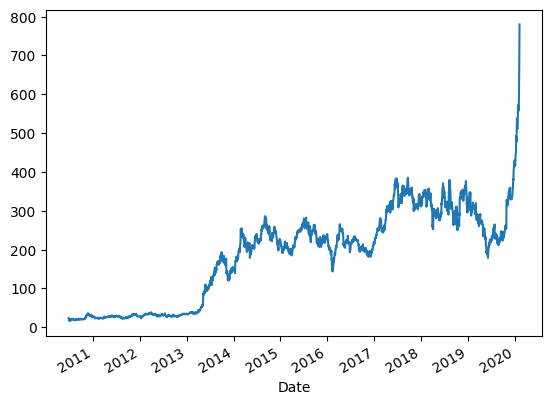

In [5]:
df['Adj Close'].plot()


## Normalizing the Dataset

In [6]:
output_var = pd.DataFrame(df['Adj Close'])

features = ['Open','High','Low','Volume']

In [7]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2010-06-29,0.004349,0.010877,0.003887,0.397214
2010-06-30,0.014676,0.017920,0.012634,0.363576
2010-07-01,0.013474,0.012073,0.008033,0.172543
2010-07-02,0.010433,0.008408,0.005664,0.106958
2010-07-06,0.005870,0.004379,0.001291,0.143747


In [8]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [9]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

print(X_test.shape)



regressor = Sequential()

regressor.add(LSTM(units = 64, return_sequences=True, input_shape = (1,X_test.shape[2]),activation='relu'))
regressor.add(LSTM(units = 64, return_sequences=False, activation='relu'))

regressor.add(Dense(1))




(219, 1, 4)


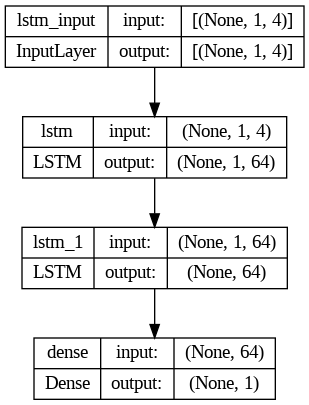

In [10]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
plot_model(regressor,show_shapes=True,show_layer_names=True)

In [11]:
history=regressor.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)


Epoch 1/100
275/275 [==============================] - 11s 12ms/step - loss: 22900.4121
Epoch 2/100
275/275 [==============================] - 2s 9ms/step - loss: 1074.8613
Epoch 3/100
275/275 [==============================] - 3s 9ms/step - loss: 721.8308
Epoch 4/100
275/275 [==============================] - 2s 9ms/step - loss: 370.5222
Epoch 5/100
275/275 [==============================] - 4s 13ms/step - loss: 271.8882
Epoch 6/100
275/275 [==============================] - 3s 11ms/step - loss: 216.4900
Epoch 7/100
275/275 [==============================] - 2s 9ms/step - loss: 175.4818
Epoch 8/100
275/275 [==============================] - 2s 9ms/step - loss: 143.3796
Epoch 9/100
275/275 [==============================] - 2s 8ms/step - loss: 118.1255
Epoch 10/100
275/275 [==============================] - 3s 13ms/step - loss: 98.3423
Epoch 11/100
275/275 [==============================] - 3s 12ms/step - loss: 82.9150
Epoch 12/100
275/275 [==============================] - 2s 8ms/step

In [12]:
y_pred= regressor.predict(X_test)


7/7 [==============================] - 0s 3ms/step


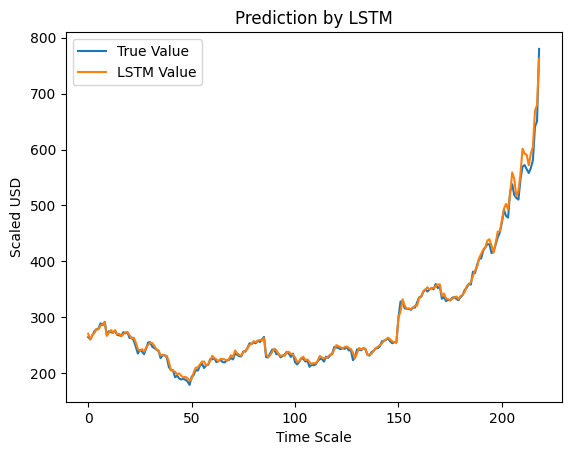

In [13]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()